Détection du label : zho  et chargement de  300  paragraphes
Détection du label : spa  et chargement de  300  paragraphes
Détection du label : eng  et chargement de  300  paragraphes
Détection du label : hin  et chargement de  300  paragraphes
Détection du label : ara  et chargement de  300  paragraphes
[47.333333333333336, 97.66666666666667, 100.0, 97.66666666666667, 99.66666666666667]


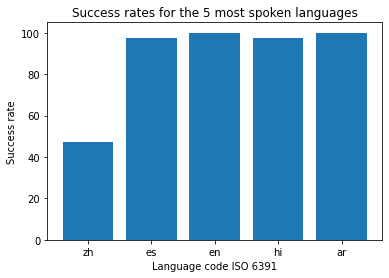

In [28]:
# This simple app uses the '/detect' resource to identify the language of
# the provided text or texts.

import os, requests, uuid, json
from matplotlib import pyplot as plt

key1_var_name     = 'COGNITIVE_SERVICE_KEY'
key2_var_name     = 'COGNITIVE_SERVICE_REGION'
endpoint_var_name = 'TRANSLATOR_TEXT_ENDPOINT'


if not key1_var_name in os.environ:
    raise Exception('Please set/export the environment variable 1: {}'.format(key1_var_name))
subscription_key = os.environ[key1_var_name]

if not key2_var_name in os.environ:
    raise Exception('Please set/export the environment variable 2: {}'.format(key2_var_name))
region_key = os.environ[key2_var_name]


if not endpoint_var_name in os.environ:
    raise Exception('Please set/export the environment variable 3: {}'.format(endpoint_var_name))
endpoint = os.environ[endpoint_var_name]


# If you encounter any issues with the base_url or path, make sure
# that you are using the latest endpoint: https://docs.microsoft.com/azure/cognitive-services/translator/reference/v3-0-detect
path = '/detect?api-version=3.0'
constructed_url = endpoint + path

headers = {
    'Ocp-Apim-Subscription-Key': subscription_key,
    'Ocp-Apim-Subscription-Region': region_key,    
    'Content-type': 'application/json',
    'X-ClientTraceId': str(uuid.uuid4())
}

mon_fichier_x      = open("x_train.txt","r")
mon_fichier_y      = open("y_train.txt","r")
contenu_x          = mon_fichier_x.readlines()
contenu_y          = mon_fichier_y.readlines()

    
    
#Extraction of texts according to the label
def recupTexte(label, nb_para):
    print('Détection du label :', label,' et chargement de ', nb_para,' paragraphes')
    i = 0
    j = 0
    global taux_success
    paragraphes = []
    for ligne_y in contenu_y:
        ligne_y = ligne_y.strip(' \n\t')
        if label == ligne_y:
            if j < nb_para:
                paragraphes.append(contenu_x[i])
                j += 1
        i += 1
        
    i_lang = len(paragraphes)
    taux_success.append(detectLang(label,*paragraphes))
#   print(i_lang)

#Detection of the languages and calculation of success rates
def detectLang(label,*param):
    i_succ     = 0
    tx_success = 0
    i_lang     = len(param)
    
    for elt in param:
        body = [{
                   'text': elt
                }]
    
        request  = requests.post(constructed_url, headers=headers, json=body)
        response = request.json()
        sc = response[0]
        if sc['language'] == 'zh-Hant' and label == 'zho':
                    i_succ += 1
        if sc['language'] == 'es' and label == 'spa':
                    i_succ += 1       
        if sc['language'] == 'en' and label == 'eng':
                    i_succ += 1   
        if sc['language'] == 'hi' and label == 'hin':
                    i_succ += 1      
        if sc['language'] == 'ar' and label == 'ara':
                    i_succ += 1
#   print(i_succ)
    if i_lang != 0:
        tx_success = i_succ / i_lang * 100
        return tx_success
    
    

# Text to translate or to detect the language.
lang_label    = ['zho','spa','eng','hin','ara']
taux_success  = []

for lab in lang_label:
    recupTexte(lab,300)
        
print(taux_success)

mon_fichier_x.close()
mon_fichier_y.close()

languages  = ['zh','es','en','hi','ar']
xs = [ i + 0.1 for i, _ in enumerate (languages)]

plt.bar (xs,taux_success)
plt.title ("Success rates for the 5 most spoken languages")
plt.ylabel ("Success rate")
plt.xlabel ("Language code ISO 6391")
plt.xticks([ i + 0.1 for i, _ in enumerate (languages)],languages)
plt.show()  
    